
## HEART DISEASE AND STROKE PREVENTION  

### Introduction:

Now that we have cleaned up our data we can take a look at some of the relationships between varaibles. It's important to find patterns so that we can make a solid analysis and provide relevant information from this data.

 To find out the types of diease condition foumd in dfifferent age group and ethinicity. A few columns needed to be dropped in order to make the data easier to work with but this should have very little impact on our analysis. The next step is to get a better idea of what we're working with.

#### Objectives
- Build data profiles, tables, and visualizations
- Explore data relationships using statistical analysis
- Select important/interesting features

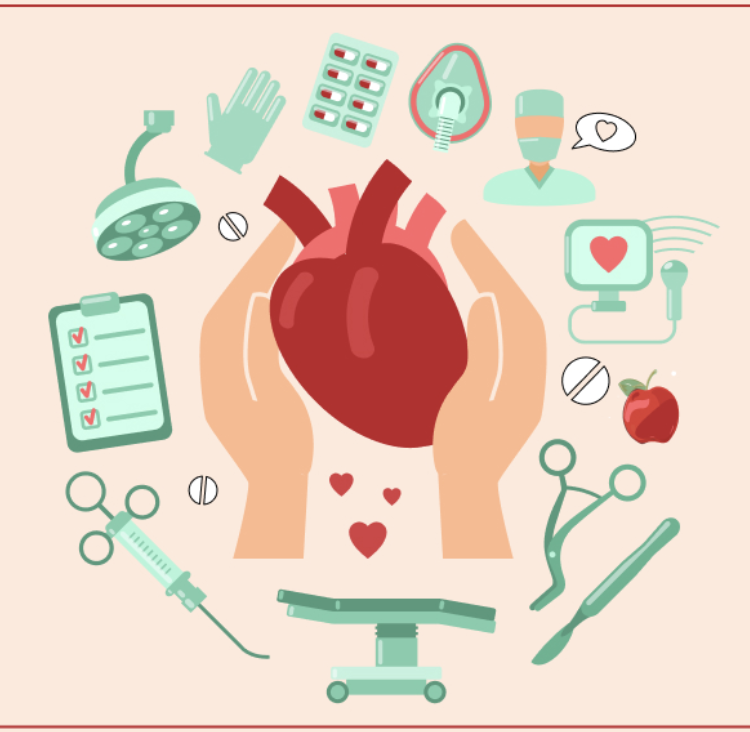

####  *Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
import sklearn as skl

import warnings 
warnings.filterwarnings('ignore')

In [4]:
# Importing data set 
pd.set_option("display.max_columns", None)

ht_data=pd.read_csv('heart_disease_data.csv')

In [5]:
ht_data

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,Data_Value_Footnote_Symbol,Data_Value_Footnote,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,Prevalence of heart failure hospitalizations a...,Crude,Percent (%),5.2,5.2,NaN,NaN,5.1,5.3,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,Prevalence of heart failure hospitalizations a...,Crude,Percent (%),5.1,5.1,NaN,NaN,5.1,5.2,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Crude,Percent (%),8.5,8.5,NaN,NaN,8.4,8.5,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Coronary Heart Disease,Prevalence of coronary heart disease hospitali...,Crude,Percent (%),5.1,5.1,NaN,NaN,5.1,5.1,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,None,None,None,None,Cardiovascular Diseases,Heart Failure,Prevalence of heart failure hospitalizations a...,Crude,Percent (%),6.1,6.1,NaN,NaN,6.1,6.1,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,2012,CO,Colorado,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),3.7,3.7,NaN,NaN,3.6,3.9,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),3.4,3.4,NaN,NaN,3.3,3.5,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),NaN,-2.0,~,Statistically unstable estimates not presented...,NaN,NaN,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),4.5,4.5,NaN,NaN,4.3,4.7,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"


In [6]:
# Drop-Columns
ht_data.drop(['Data_Value_Footnote'], axis=1,inplace = True)
ht_data.drop(['Data_Value_Footnote_Symbol'], axis=1,inplace = True)

In [7]:
# Drop duplicates row if any:
ht_data = ht_data.drop_duplicates(keep='first')

In [8]:
#Shape of the data
ht_data.shape

(42640, 27)

In [9]:
# Summary statestcs 
ht_data.describe()

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,42640.000000,42111.000000,42640.000000,42111.000000,42111.000000,42640.000000
mean,2008.500000,14.780896,14.572709,12.661509,17.074028,29.538462
std,2.872315,13.286487,13.333826,11.453615,17.910274,16.064317
min,2004.000000,0.400000,-2.000000,0.000000,1.100000,1.000000
25%,2006.000000,4.500000,4.400000,3.800000,5.000000,16.750000
50%,2008.500000,10.700000,10.400000,8.200000,12.700000,29.500000
75%,2011.000000,21.600000,21.500000,19.600000,23.400000,42.500000
max,2013.000000,333.300000,333.300000,94.200000,710.500000,59.000000


In [10]:
ht_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42640 entries, 0 to 42639
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 42640 non-null  int64  
 1   LocationAbbr         42640 non-null  object 
 2   LocationDesc         42640 non-null  object 
 3   DataSource           42640 non-null  object 
 4   PriorityArea1        42640 non-null  object 
 5   PriorityArea2        42640 non-null  object 
 6   PriorityArea3        42640 non-null  object 
 7   PriorityArea4        42640 non-null  object 
 8   Category             42640 non-null  object 
 9   Topic                42640 non-null  object 
 10  Indicator            42640 non-null  object 
 11  Data_Value_Type      42640 non-null  object 
 12  Data_Value_Unit      42640 non-null  object 
 13  Data_Value           42111 non-null  float64
 14  Data_Value_Alt       42640 non-null  float64
 15  LowConfidenceLimit   42111 non-null 

In [11]:
#Columns present in the dataset
ht_data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'Break_Out_Category', 'Break_Out', 'CategoryId', 'TopicId',
       'IndicatorID', 'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId',
       'LocationID', 'GeoLocation'],
      dtype='object')

### * Exploratory Data Analysis

In [12]:
# To find how many people have heart disease and how many people suffering from different heart disease

ht_data.Topic.value_counts()

Heart Failure                                 19240
Coronary Heart Disease                         4680
Stroke                                         4680
Major Cardiovascular Disease                   4680
Diseases of the Heart (Heart Disease)          4680
Acute Myocardial Infarction (Heart Attack)     4680
Name: Topic, dtype: int64

In [13]:
ht_data.tail()

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,Indicator,Data_Value_Type,Data_Value_Unit,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
42635,2012,CO,Colorado,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),3.7,3.7,3.6,3.9,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),3.4,3.4,3.3,3.5,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),NaN,-2.0,NaN,NaN,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),4.5,4.5,4.3,4.7,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"
42639,2012,IA,Iowa,Medicare,Million Hearts,None,None,None,Cardiovascular Diseases,Stroke,Prevalence of cerebrovascular disease hospital...,Crude,Percent (%),4.0,4.0,3.8,4.2,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,19,"(42.46940091300047, -93.81649055599968)"


In [14]:
ht_data.Topic.value_counts()

Heart Failure                                 19240
Coronary Heart Disease                         4680
Stroke                                         4680
Major Cardiovascular Disease                   4680
Diseases of the Heart (Heart Disease)          4680
Acute Myocardial Infarction (Heart Attack)     4680
Name: Topic, dtype: int64

<AxesSubplot:>

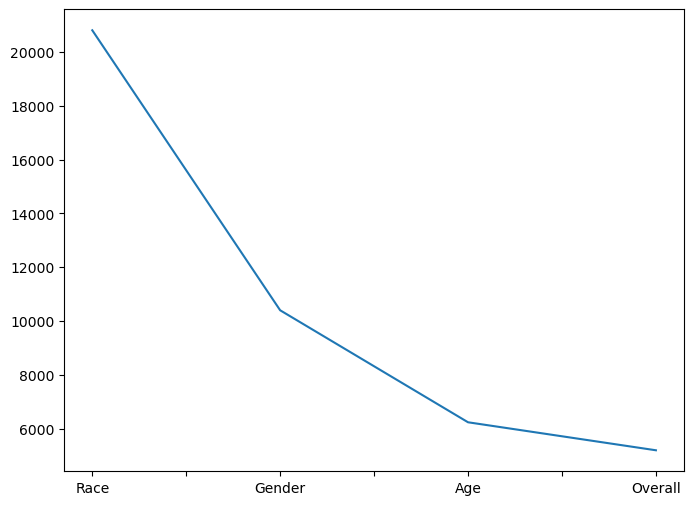

In [15]:
# Plotting Line chart of break_out_category

ht_data.Break_Out_Category.value_counts().plot(kind="line",figsize=(8,6))

- Break out category is divided into Age, Gender, Race and Overall and which is again divided in to the different categories.
- Race is higher among other category.
- Overall categories is lesser among other category.

<AxesSubplot:>

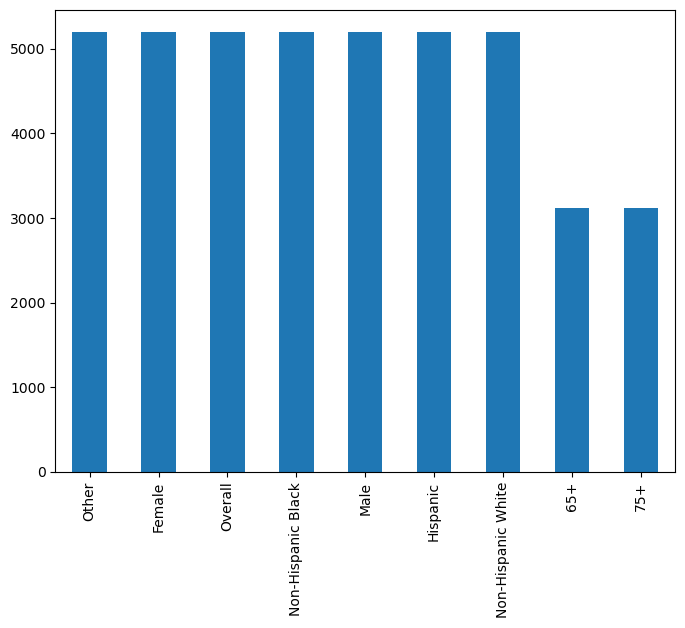

In [16]:
# Plotting bar chart of break_out_category
ht_data.Break_Out.value_counts().plot(kind="bar",figsize=(8,6))

Break out is divided into Non-Hispanic Black, Non-Hispanic White , Female,Male,Other, ,65+ ,75+, overall.
From this Non-Hispanic Black,Female,Other,Male,Non-Hispanic Asian,Overall, Non-Hispanic White ,Hispanic having more number of data and all data are equal in numbers.
20-24 age group data is very less as compared to others.

Text(0.5, 1.0, 'Histogram of Topic')

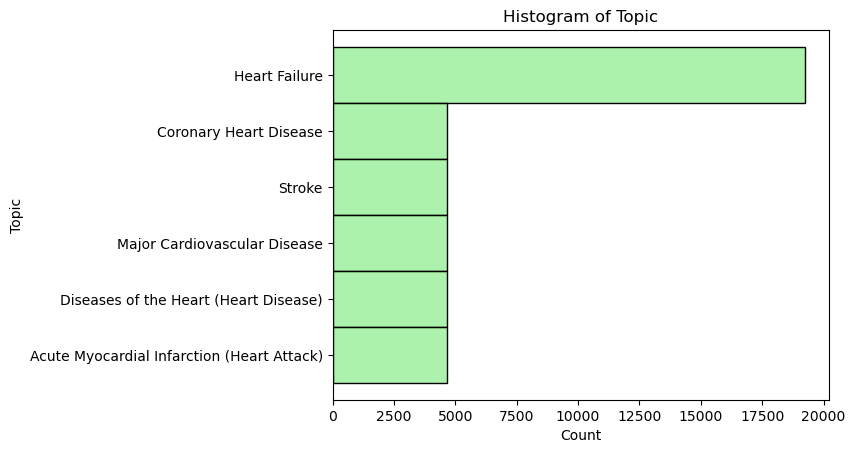

In [17]:
# Histplot of Topic to find out the cou
sns.histplot(y="Topic",data=ht_data,color="Lightgreen")
plt.title('Histogram of Topic')

In [18]:
ht_data.value_counts(['PriorityArea1'])

PriorityArea1 
None              33280
Million Hearts     9360
dtype: int64

- Million hearts and None are two unique values in PriorityArea 1.
- 9360 people included in million hearts for improving the nation's health and preventing stroke.

Text(0, 0.5, 'Count')

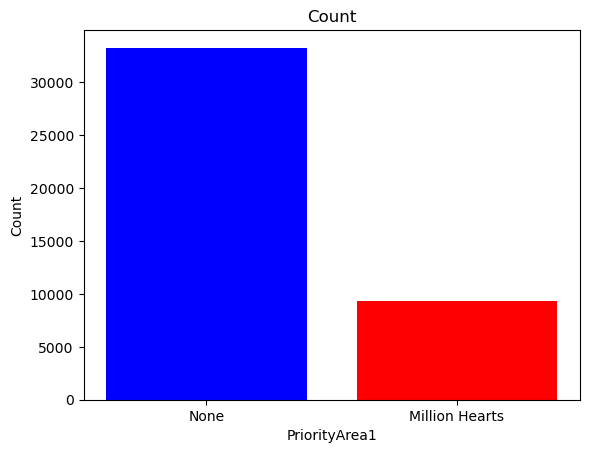

In [19]:
#Barplot of PriorityArea1

PriorityArea1=ht_data['PriorityArea1'].value_counts().to_frame().reset_index()
plt.bar(PriorityArea1['index'],PriorityArea1['PriorityArea1'], color=['blue','red'])#plotting bar graph
plt.title('Count')#title of the the bar graph
plt.xlabel('PriorityArea1') #labelling x axis 
plt.ylabel('Count')#labelling y axis

In [20]:
ht_data.value_counts(['PriorityArea2'])

PriorityArea2
None             42640
dtype: int64

Text(0, 0.5, 'Count')

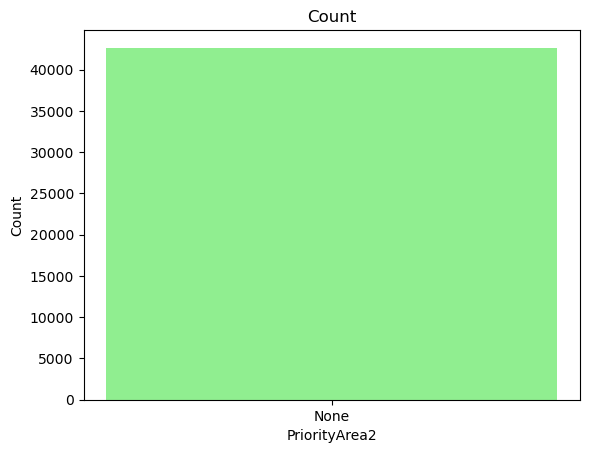

In [21]:
# barplot of PriorityArea2
PriorityArea2=ht_data['PriorityArea2'].value_counts().to_frame().reset_index()
plt.bar(PriorityArea2['index'],PriorityArea2['PriorityArea2'], color=['lightgreen','blue'])#plotting bar graph
plt.title('Count')#title of the the bar graph
plt.xlabel('PriorityArea2') #labelling x axis 
plt.ylabel('Count')#labelling y axis


<AxesSubplot:>

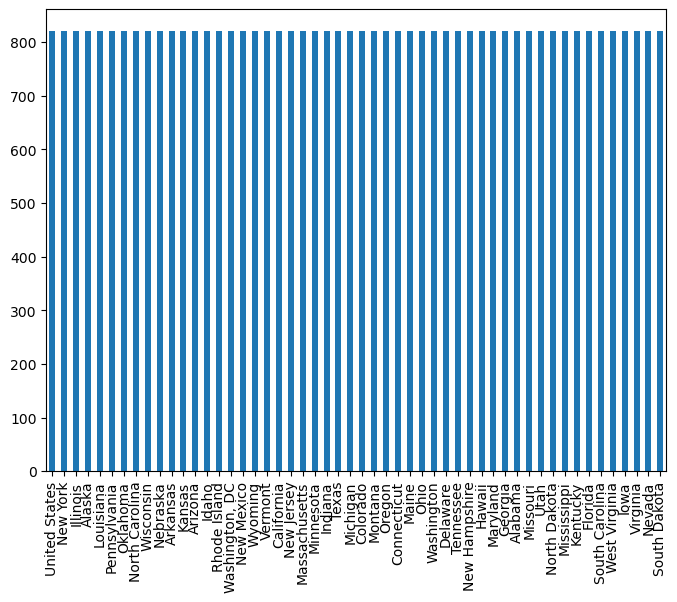

In [22]:
# Plotting barchart of Location
plt.figure(figsize=(30,30))
ht_data.LocationDesc.value_counts().plot(kind="bar",figsize=(8,6))

- From this plot it is clear that an equal number of data collected each location of U.S

# Count plot of Indicator

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

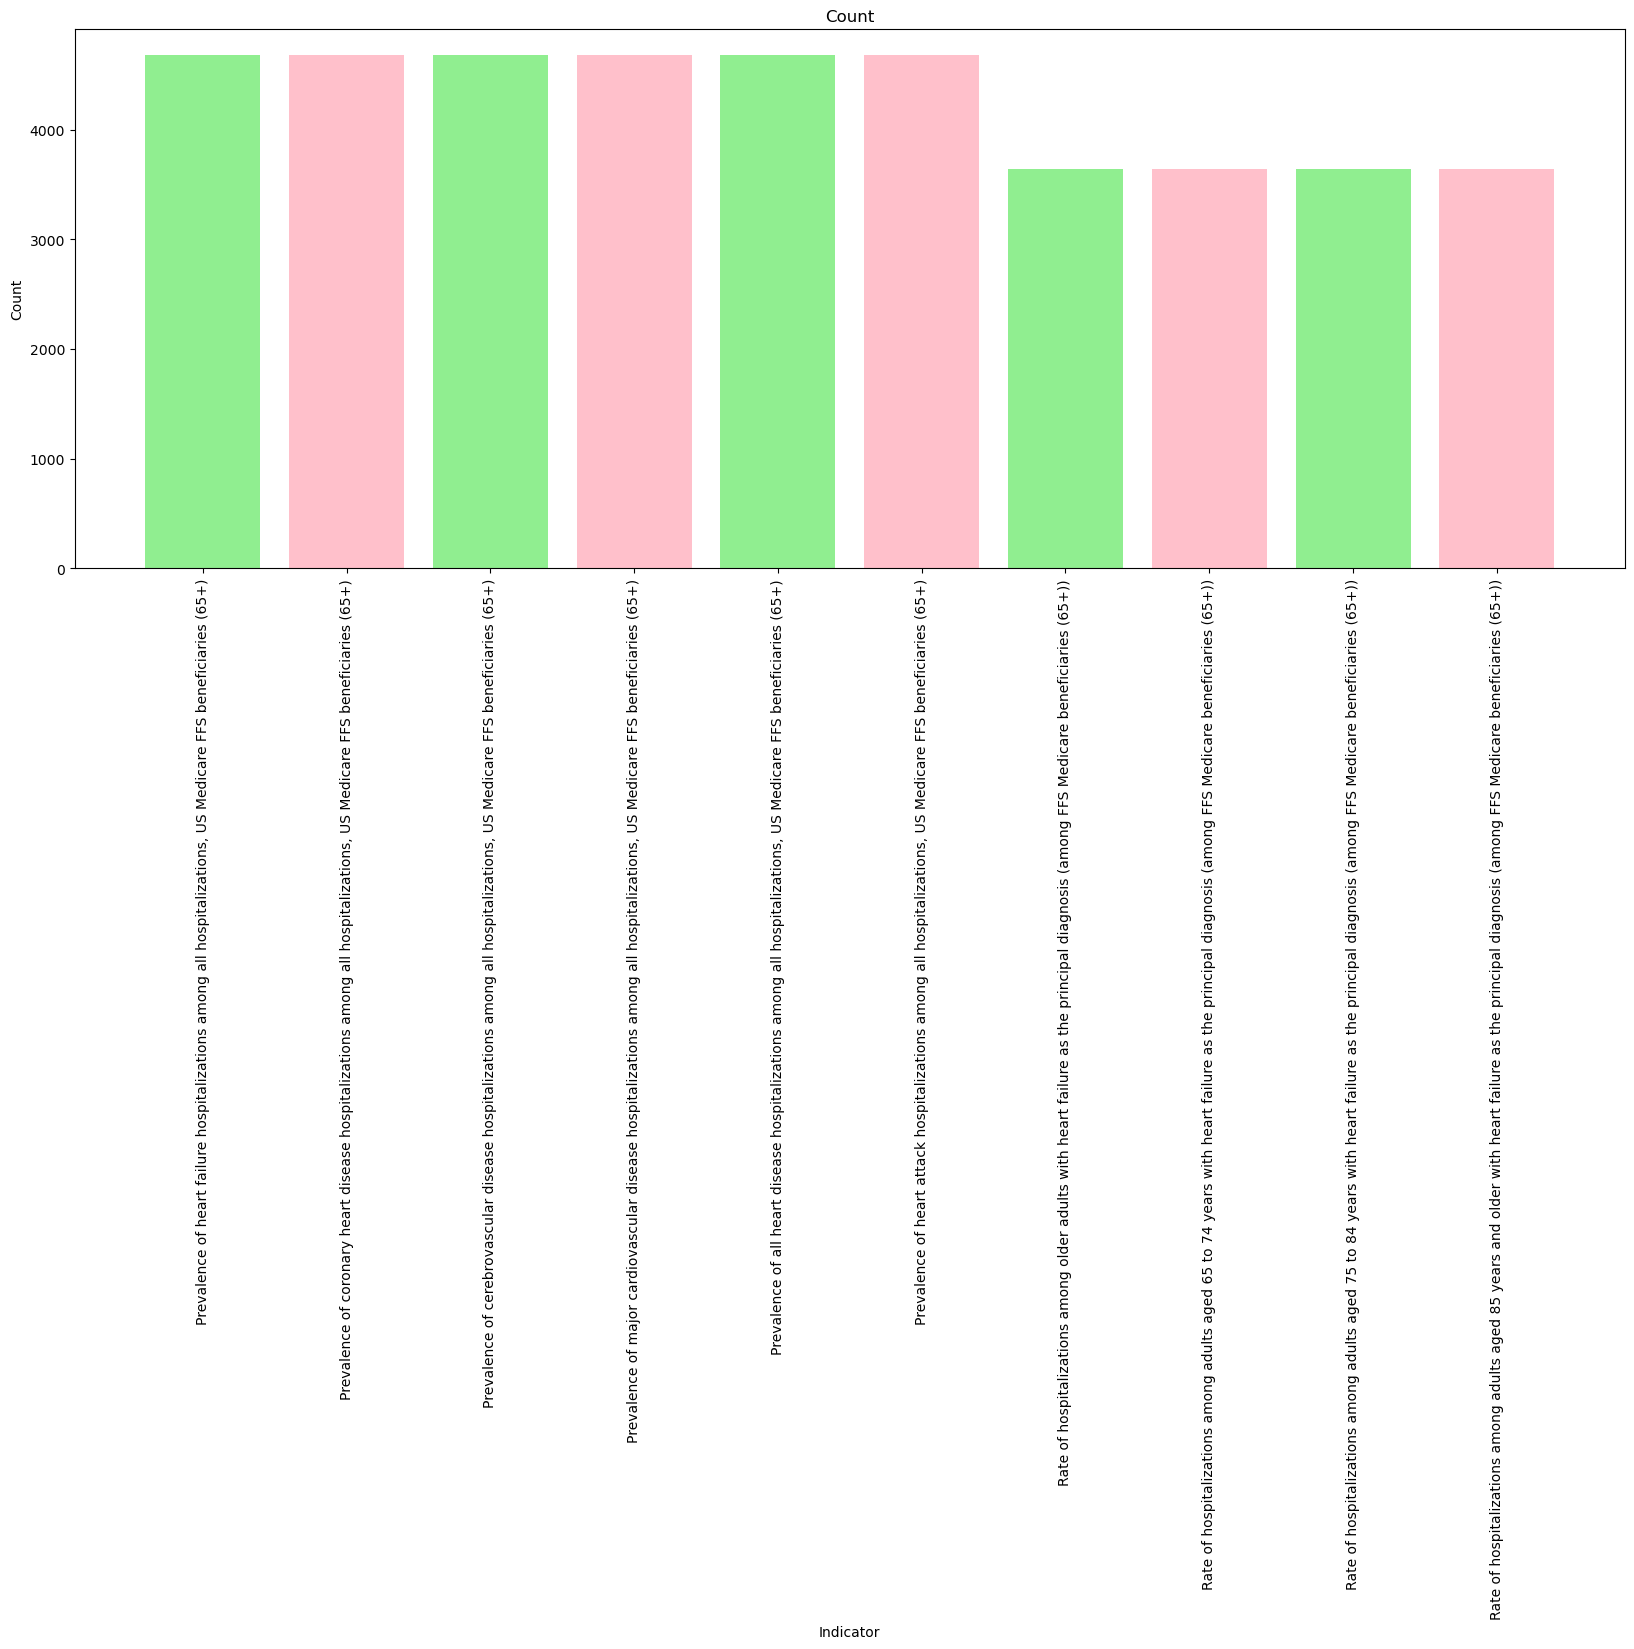

In [23]:
#Count plot of indicator
plt.figure(figsize=(20, 7))
Indicator=ht_data['Indicator'].value_counts().to_frame().reset_index()
plt.bar(Indicator['index'],Indicator['Indicator'], color=['lightgreen','pink'])#plotting bar graph
plt.title('Count') #title of the the bar graph
plt.xlabel('Indicator')  #labelling x axis 
plt.ylabel('Count') #labelling y axis
plt.xticks(rotation='vertical')

# BOX PLOT

In [24]:
ht_data.columns

Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'Break_Out_Category', 'Break_Out', 'CategoryId', 'TopicId',
       'IndicatorID', 'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId',
       'LocationID', 'GeoLocation'],
      dtype='object')

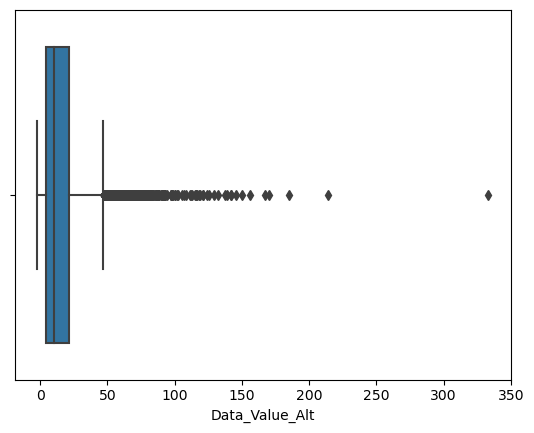

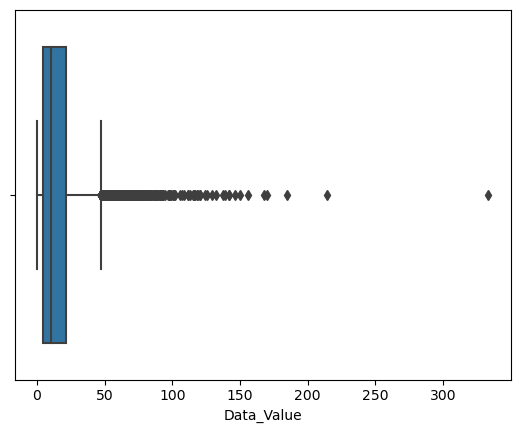

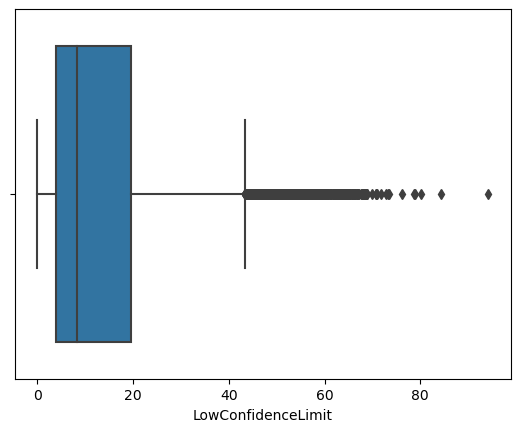

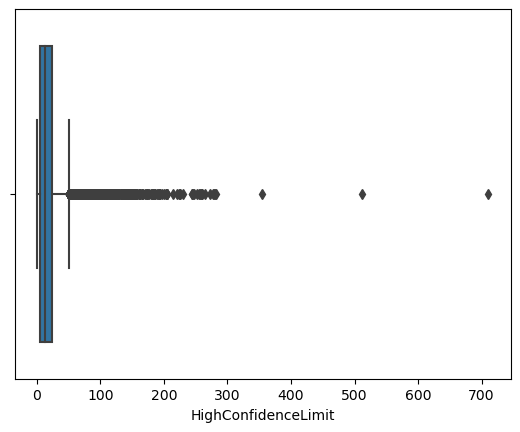

In [25]:
for i in ['Data_Value_Alt','Data_Value','LowConfidenceLimit', 'HighConfidenceLimit']:
    sns.boxplot(x=ht_data[i])
    plt.show()

-  From this plot it is clear that there is outliers present in the 'Data_Value_Alt.

# Frequency graph of dataset

In [26]:
#Frequency graph of dataset
freqgraph=ht_data
freqgraph.hist
plt.show()

## Bivariate Data Analysis

In [27]:
ht_data.Break_Out.value_counts()

Other                 5200
Female                5200
Overall               5200
Non-Hispanic Black    5200
Male                  5200
Hispanic              5200
Non-Hispanic White    5200
65+                   3120
75+                   3120
Name: Break_Out, dtype: int64

In [28]:
pd.crosstab(ht_data.Topic,ht_data.Break_Out)

Break_Out,65+,75+,Female,Hispanic,Male,Non-Hispanic Black,Non-Hispanic White,Other,Overall
Topic,,,,,,,,,
Acute Myocardial Infarction (Heart Attack),520,520,520,520,520,520,520,520,520
Coronary Heart Disease,520,520,520,520,520,520,520,520,520
Diseases of the Heart (Heart Disease),520,520,520,520,520,520,520,520,520
Heart Failure,520,520,2600,2600,2600,2600,2600,2600,2600
Major Cardiovascular Disease,520,520,520,520,520,520,520,520,520
Stroke,520,520,520,520,520,520,520,520,520


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Heart Failure'),
  Text(1, 0, 'Coronary Heart Disease'),
  Text(2, 0, 'Stroke'),
  Text(3, 0, 'Major Cardiovascular Disease'),
  Text(4, 0, 'Diseases of the Heart (Heart Disease)'),
  Text(5, 0, 'Acute Myocardial Infarction (Heart Attack)')])

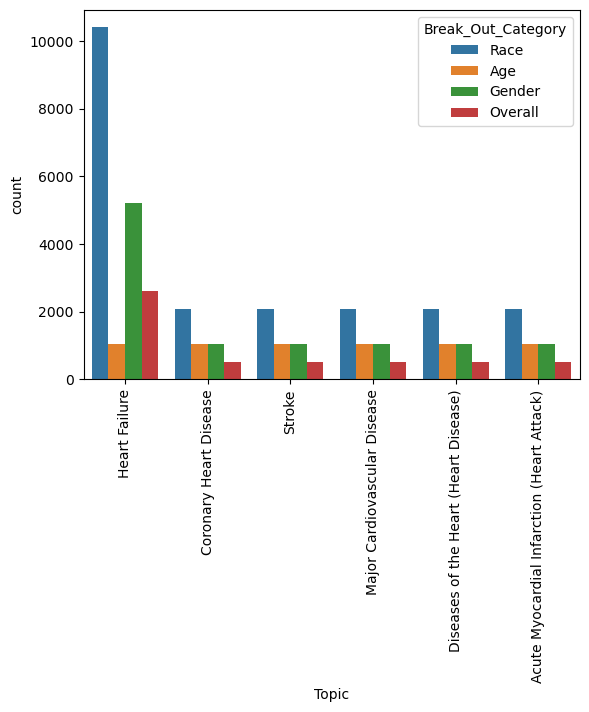

In [29]:
sns.countplot(x="Topic",data=ht_data,hue="Break_Out_Category")
plt.xticks(rotation='vertical')

- 12000 people with different race suffering from Heart failure and come under the first category.
- According to graph age are equally distributed among other cardiac diseases i,e. 1000.
- 5000 people with gender suffering from cardiac disease. 
- 500 overall suffering from all cardiac disease except heart failure i,e. 2500.


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Heart Failure'),
  Text(1, 0, 'Coronary Heart Disease'),
  Text(2, 0, 'Stroke'),
  Text(3, 0, 'Major Cardiovascular Disease'),
  Text(4, 0, 'Diseases of the Heart (Heart Disease)'),
  Text(5, 0, 'Acute Myocardial Infarction (Heart Attack)')])

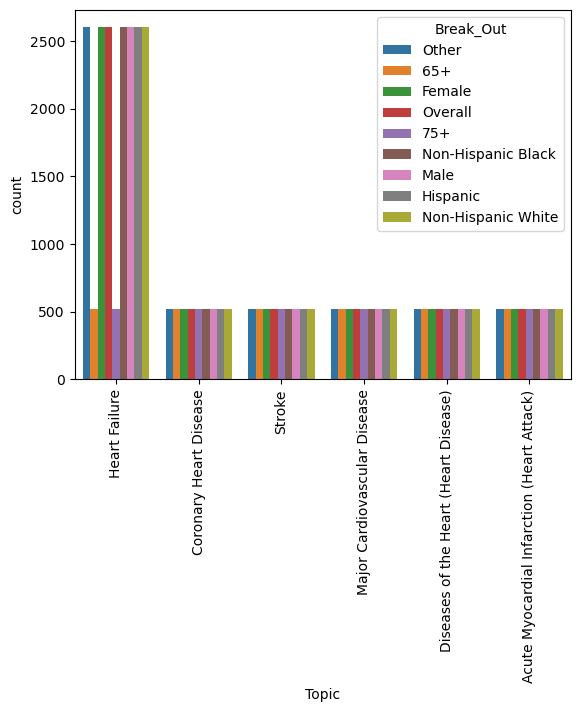

In [30]:
sns.countplot(x="Topic",data=ht_data,hue="Break_Out")
plt.xticks(rotation='vertical')

- Heart failure is present almost each and very category except 65+ and 75+ year olds.
- other cardiac diseases is equally distributed among break_out category. 


(array([0]), [Text(0, 0, 'Cardiovascular Diseases')])

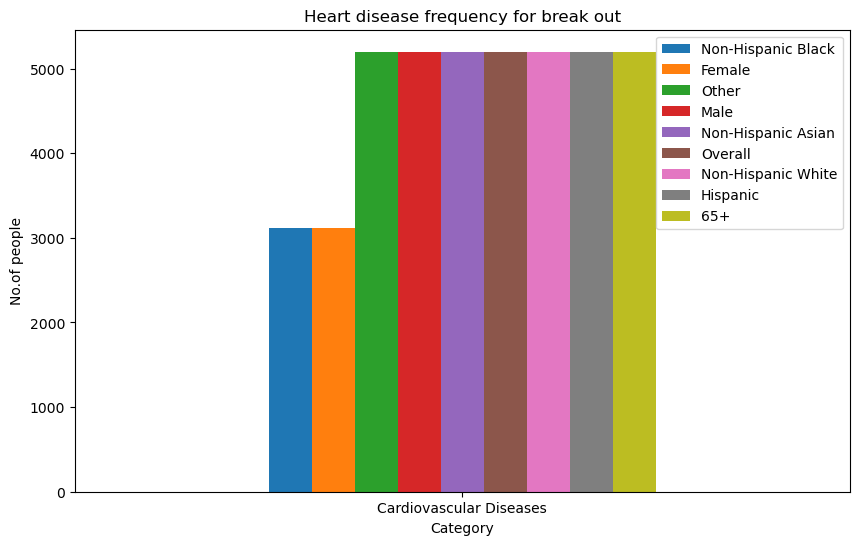

In [31]:
pd.crosstab(ht_data.Category,ht_data.Break_Out).plot(kind="bar",figsize=(10,6))
plt.title("Heart disease frequency for break out")
plt.ylabel("No.of people")
plt.legend(["Non-Hispanic Black","Female","Other","Male","Non-Hispanic Asian","Overall","Non-Hispanic White","Hispanic","65+","75+","25-44","45-64","35+","18-24","20-24 "])
plt.xticks(rotation=0)

## Scatter plot of Data value and Topic

<AxesSubplot:xlabel='Data_Value', ylabel='Topic'>

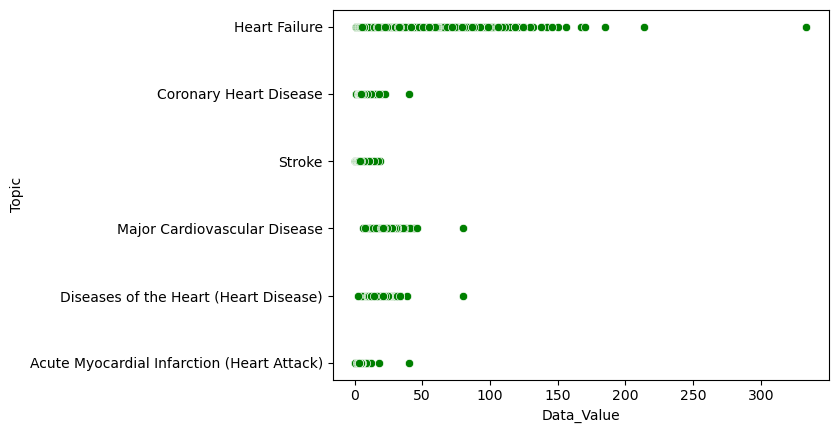

In [32]:
sns.scatterplot(ht_data['Data_Value'],ht_data['Topic'],color="Green")

- Heart failure is in the heighest in population than other diesase.
- Acute Myocardial Infraction(Heart Attack) is the lowest in population. 

###### scatterplot of priority area1 and datavalues

Text(0.5, 1.0, 'priority area1 vs datavalues')

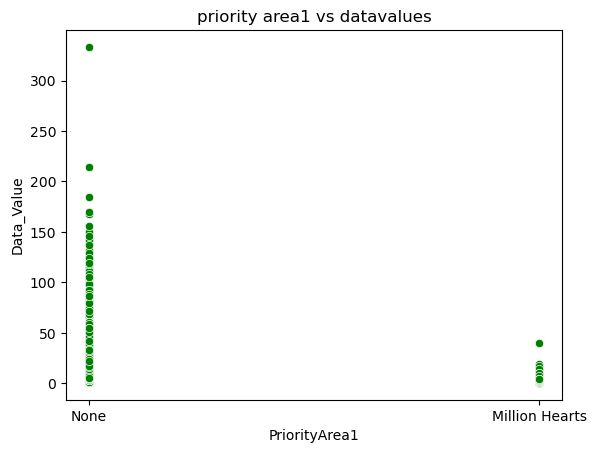

In [33]:
#scatterplot of priority area1 and datavalues
sns.scatterplot(ht_data['PriorityArea1'],ht_data['Data_Value'],color="green")
plt.title("priority area1 vs datavalues")

Text(0.5, 1.0, 'priority area2 vs datavalues')

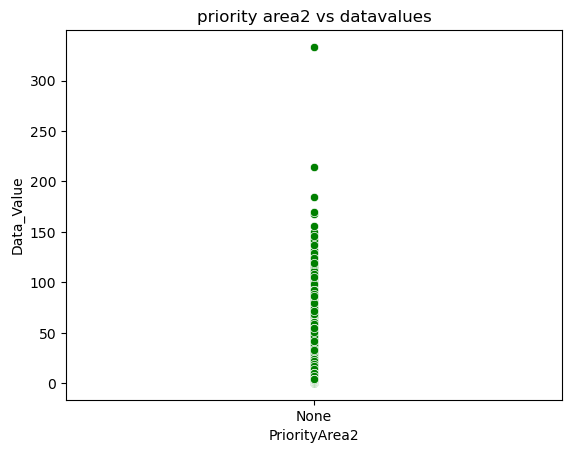

In [34]:
#scatterplot of priority area2 and datavalues
sns.scatterplot(ht_data['PriorityArea2'],ht_data['Data_Value'],color="Green")
plt.title("priority area2 vs datavalues")

Text(0.5, 1.0, 'priority area3 vs datavalues')

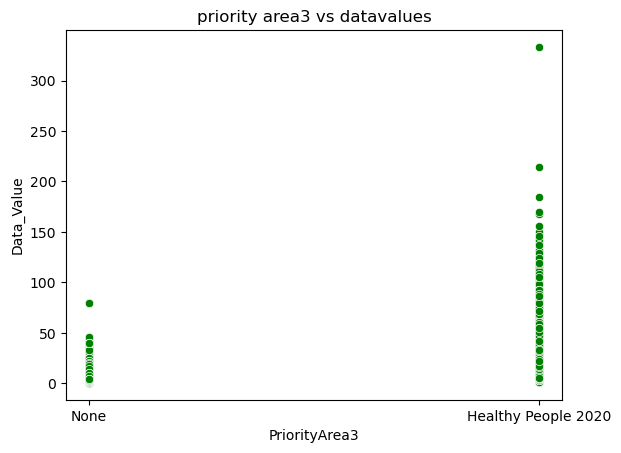

In [35]:
#scatterplot of priority area3 and datavalues
sns.scatterplot(ht_data['PriorityArea3'],ht_data['Data_Value'],color="green")
plt.title("priority area3 vs datavalues")

 - priority area3 and datavalues gives an idea about how data values are distributed with priority areas
- In the last plot, there is a balance between Healthy people 2020.

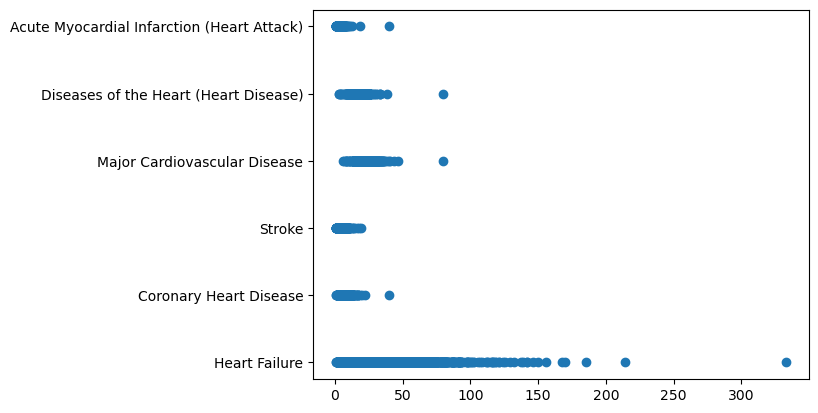

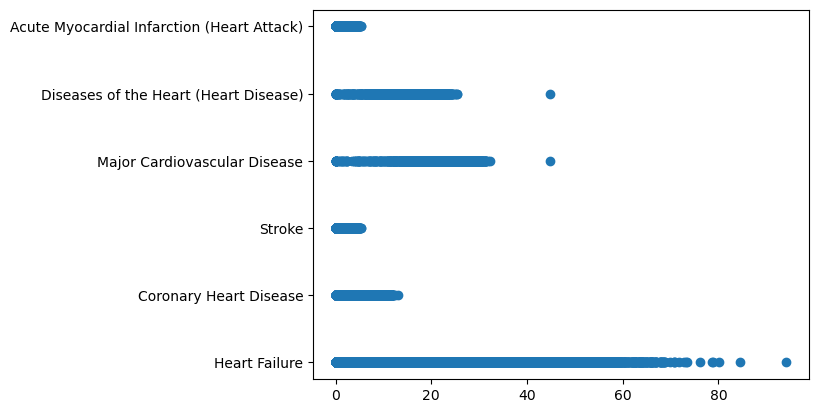

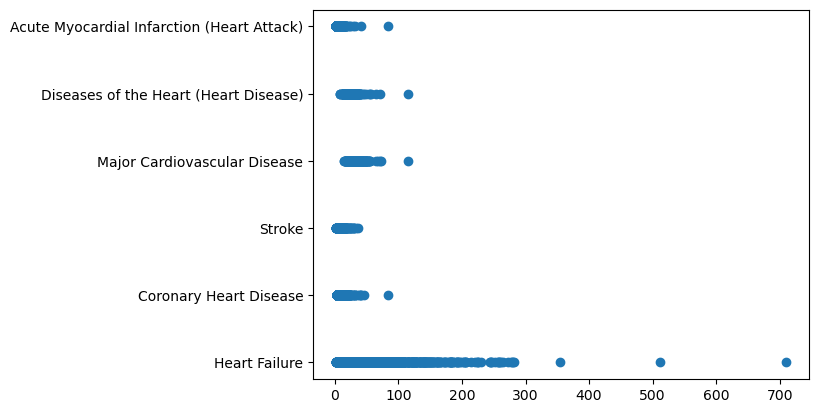

In [36]:
# scatter plots
plt.scatter(ht_data['Data_Value'],ht_data['Topic'])
plt.show()
plt.scatter(ht_data['LowConfidenceLimit'], ht_data['Topic'])
plt.show()

plt.scatter(ht_data['HighConfidenceLimit'], ht_data['Topic'])
plt.show()
    



<AxesSubplot:xlabel='Category', ylabel='Count'>

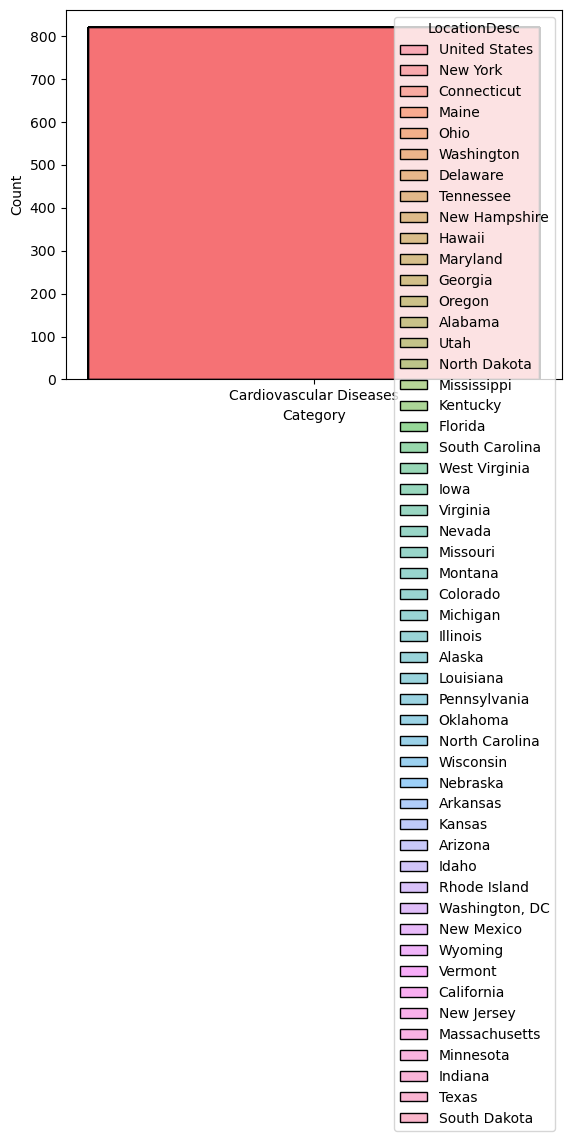

In [37]:
sns.histplot(x="Category",data=ht_data,hue="LocationDesc")

In [38]:
ht_data.columns


Index(['Year', 'LocationAbbr', 'LocationDesc', 'DataSource', 'PriorityArea1',
       'PriorityArea2', 'PriorityArea3', 'PriorityArea4', 'Category', 'Topic',
       'Indicator', 'Data_Value_Type', 'Data_Value_Unit', 'Data_Value',
       'Data_Value_Alt', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'Break_Out_Category', 'Break_Out', 'CategoryId', 'TopicId',
       'IndicatorID', 'Data_Value_TypeID', 'BreakOutCategoryId', 'BreakOutId',
       'LocationID', 'GeoLocation'],
      dtype='object')

In [39]:
pd.crosstab(ht_data.Topic,ht_data.Break_Out)


Break_Out,65+,75+,Female,Hispanic,Male,Non-Hispanic Black,Non-Hispanic White,Other,Overall
Topic,,,,,,,,,
Acute Myocardial Infarction (Heart Attack),520,520,520,520,520,520,520,520,520
Coronary Heart Disease,520,520,520,520,520,520,520,520,520
Diseases of the Heart (Heart Disease),520,520,520,520,520,520,520,520,520
Heart Failure,520,520,2600,2600,2600,2600,2600,2600,2600
Major Cardiovascular Disease,520,520,520,520,520,520,520,520,520
Stroke,520,520,520,520,520,520,520,520,520


### Multivariate Data Analysis

In [40]:
ht_data.corr()

,Year,Data_Value,Data_Value_Alt,LowConfidenceLimit,HighConfidenceLimit,LocationID
Year,1.000000e+00,-0.077007,-0.075248,-0.072663,-0.068399,3.245610e-15
Data_Value,-7.700690e-02,1.000000,1.000000,0.887767,0.932128,8.903116e-03
Data_Value_Alt,-7.524775e-02,1.000000,1.000000,0.887767,0.932128,2.931967e-03
LowConfidenceLimit,-7.266295e-02,0.887767,0.887767,1.000000,0.666933,5.041639e-03
HighConfidenceLimit,-6.839893e-02,0.932128,0.932128,0.666933,1.000000,1.190213e-02
LocationID,3.245610e-15,0.008903,0.002932,0.005042,0.011902,1.000000e+00


<AxesSubplot:>

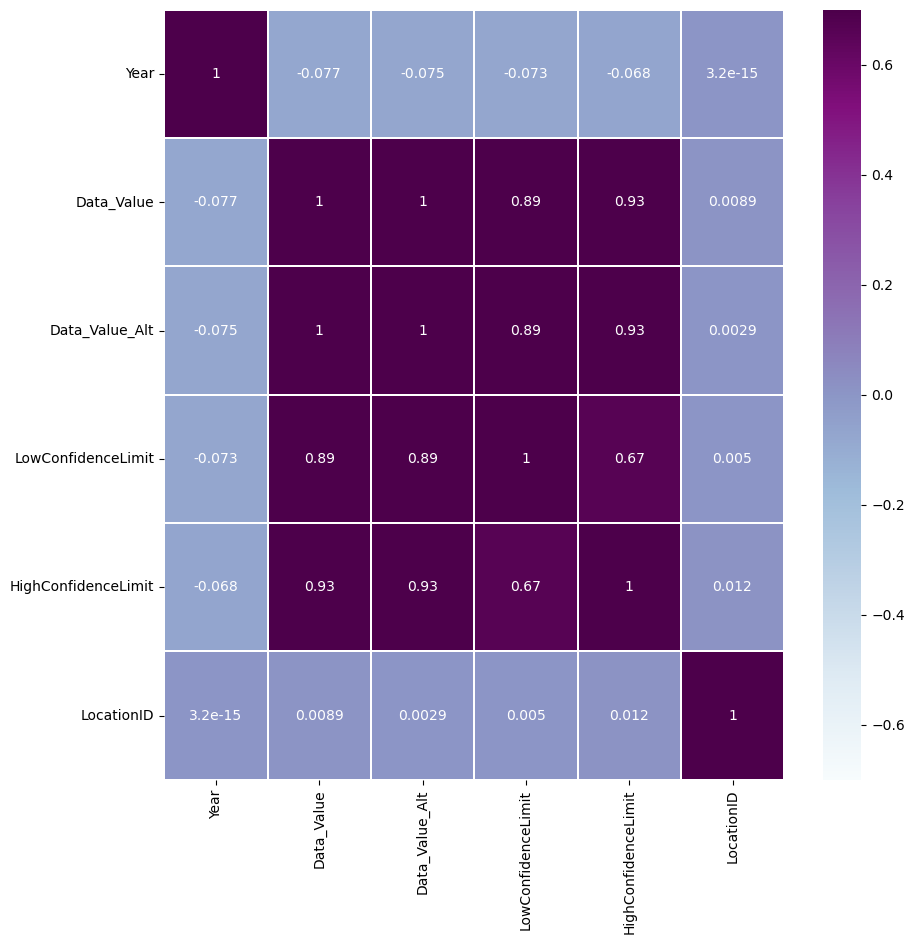

In [41]:
corr= ht_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corr,vmin=-0.7, vmax=0.7,linewidths=0.1,annot=True,cmap="BuPu")

### Insights from the graph,

- The correlation between Data_Value and Data_Value_Alt are 1.
- LowConfidenceLimit and Data_Value are highly coorelated.
- LowConfidenceLimit and HighConfidenceLimit are highly coorelated.
- Correlation between Year and other features are very low.
- Correlation between LocationId and other features are very low

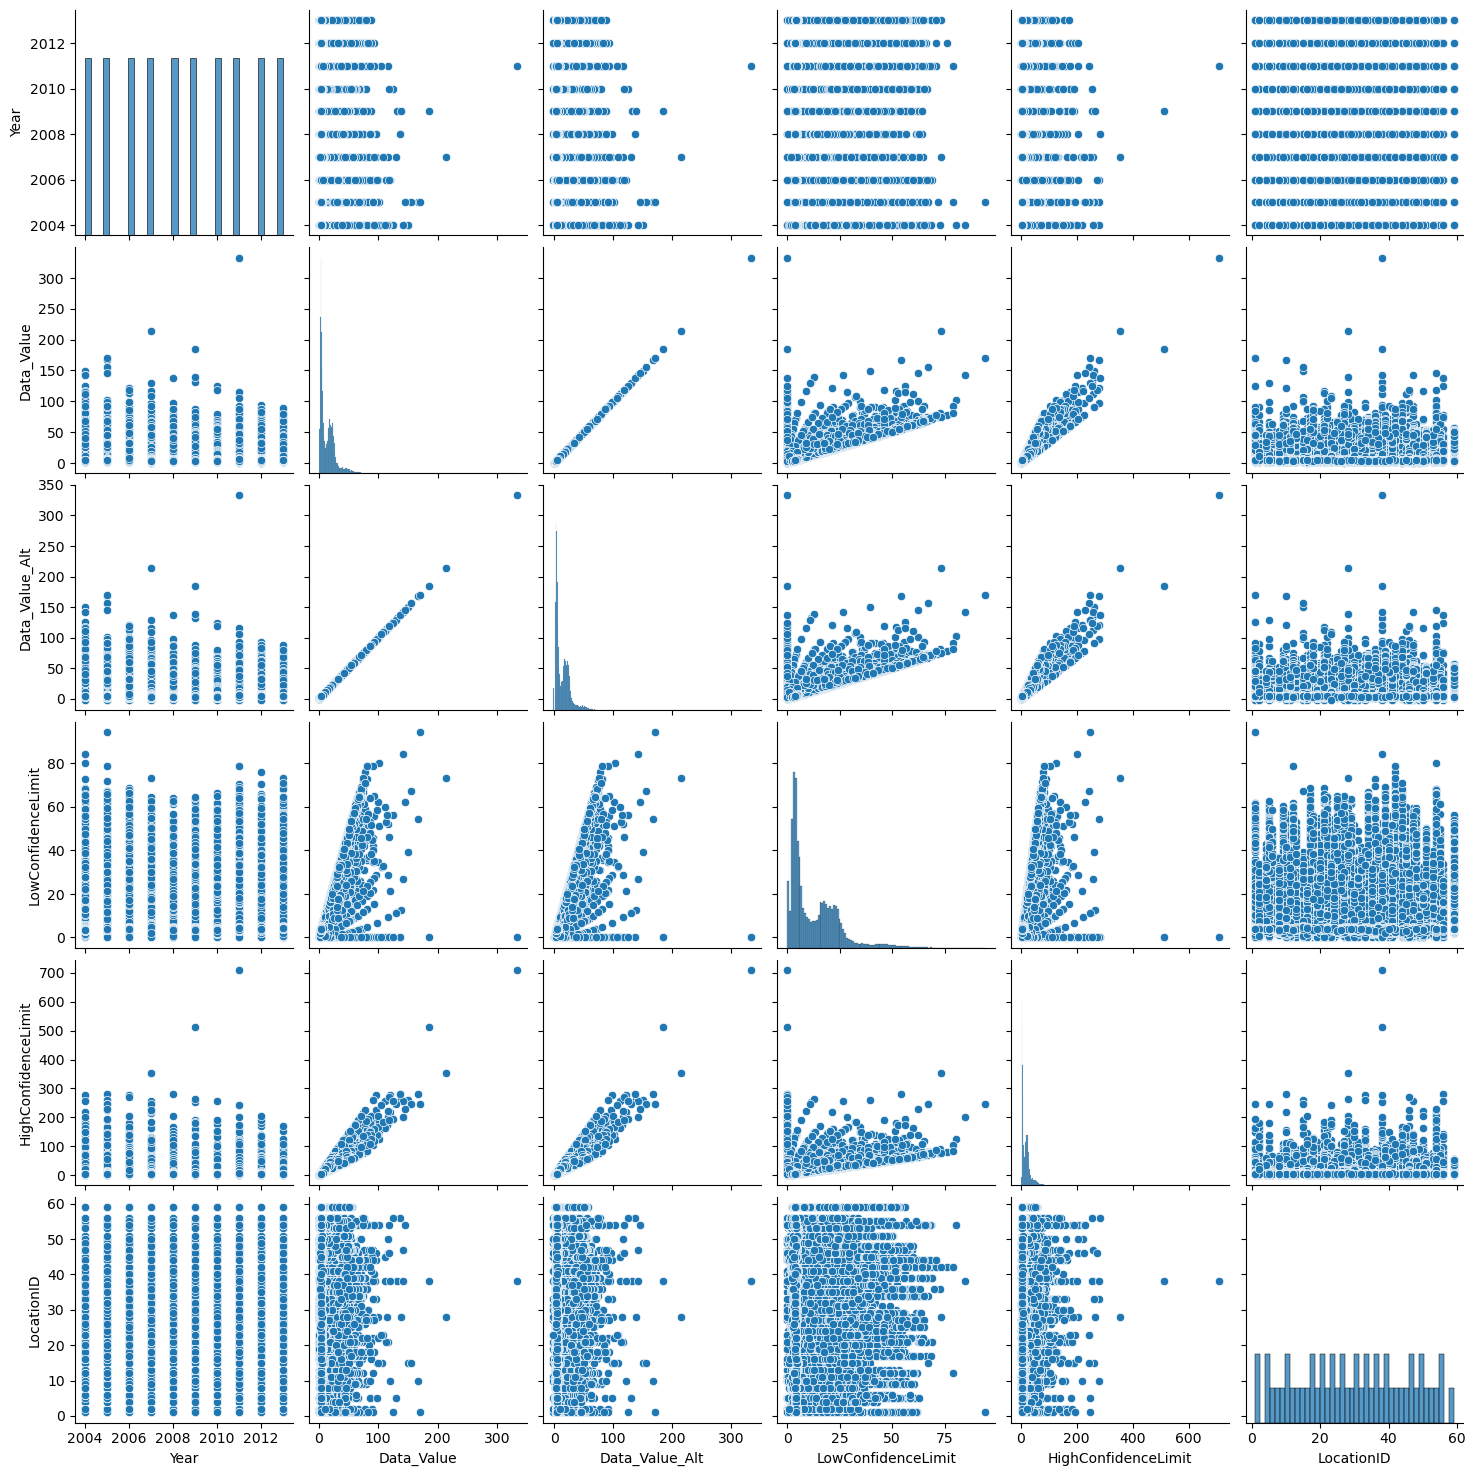

In [42]:
sns.pairplot(ht_data)

In [ ]:
sns.pairplot(ht_data, hue="Category")

## Pandas Profiling (EDA)

In [ ]:
pip install plotnine

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib.style as stl
import seaborn as sns
import sklearn as skl
import ydata_profiling as pf
from ydata_profiling import ProfileReport
import sys
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from plotnine import (ggplot, aes, geom_point, geom_smooth, labs, theme_xkcd)
import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
df = pf.ProfileReport(ht_data)


In [ ]:
# Importing data set 
pd.set_option("display.max_columns", None)

ht_data=pd.read_csv('heart_disease_data.csv')


In [ ]:
 
#To generate a HTML report file, save the ProfileReport to an object and use the to_file() function:

df.to_file("ht_df.html")


In [ ]:
# As a JSON string
json_data = df.to_json()

# As a file
df.to_file("your_report.json")

              ~~~~~~~~~~~~" We got insight from data "~~~~~~~~~~~~